In [38]:
import pandas as pd
import numpy as np

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

from sklearn.manifold import MDS
from sklearn.metrics.pairwise import euclidean_distances

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [39]:
columns=["Возраст", "Количество иждивенцев", "Доход", "Срок проживания в регионе", "Оценка автомобиля заемщика", "Размер кредита"]

In [40]:
#чтение данных
data = pd.read_excel("data_5var.xls", header=None)
data.columns = columns
data.head(10)

,Возраст,Количество иждивенцев,Доход,Срок проживания в регионе,Оценка автомобиля заемщика,Размер кредита
0,25.0,0.0,25700.0,1.0,23000.0,241000.0
1,NaN,1.0,27400.0,4.0,26000.0,265000.0
2,38.0,2.0,24300.0,9.0,24000.0,242000.0
3,35.0,NaN,23700.0,7.0,23000.0,231000.0
4,42.0,2.0,25300.0,11.0,26000.0,256000.0
5,19.0,2.0,8000.0,12.0,50000.0,200000.0
6,48.0,4.0,NaN,14.0,39000.0,385000.0
7,37.0,2.0,33000.0,7.0,NaN,328000.0
8,42.0,3.0,34400.0,NaN,35000.0,348000.0
9,40.0,2.0,31300.0,9.0,31000.0,314000.0


In [41]:
data.shape

(46, 6)

## Задание 1. 
Рассмотрите данные и вычислите основные характеристики признаков: среднее, стандартное
отклонение, медиана, квартили. Постройте гистограммы признаков и блок диаграммы 
признаков. Сделайте первые выводы о возможном распределении признаков.

In [42]:
data.describe()

,Возраст,Количество иждивенцев,Доход,Срок проживания в регионе,Оценка автомобиля заемщика,Размер кредита
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,39.348837,2.069767,19765.116279,10.279070,21674.418605,207697.674419
std,9.047188,1.009369,9489.088564,4.817259,10901.552817,94999.131546
min,19.000000,0.000000,1500.000000,1.000000,0.000000,10000.000000
25%,33.000000,1.500000,12300.000000,7.000000,15000.000000,145000.000000
50%,41.000000,2.000000,20900.000000,11.000000,22000.000000,215000.000000
75%,45.500000,3.000000,26550.000000,14.000000,28000.000000,276000.000000
max,57.000000,4.000000,35400.000000,21.000000,50000.000000,385000.000000


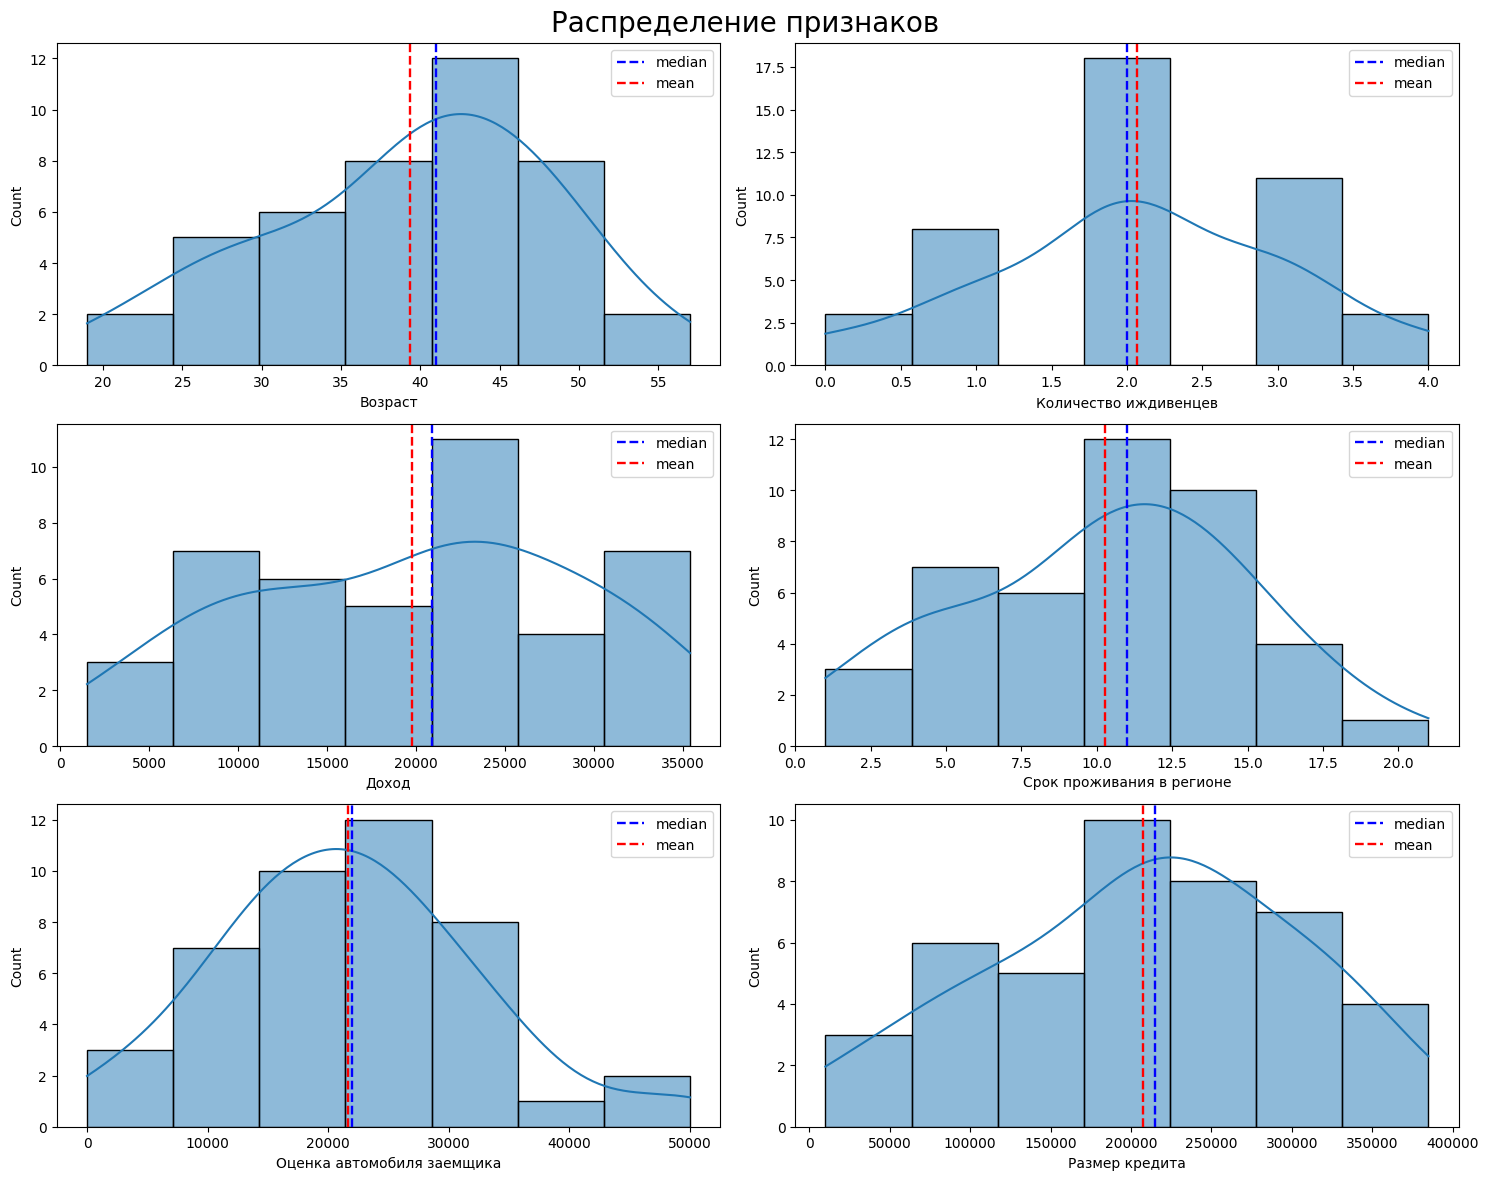

In [43]:
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
for feature, ax in zip(data, axes.flat):
    sns.histplot(data[feature], ax=ax, kde=True) 
    ax.axvline(x=data[feature].median(),
            color='blue',
            ls='--', 
            lw=1.7,
            label='median')

    ax.axvline(x=data[feature].mean(),
                color='red',
                ls='--', 
                lw=1.7,
                label='mean')
    ax.legend()

fig.suptitle('Распределение признаков', fontsize=20)
plt.tight_layout()

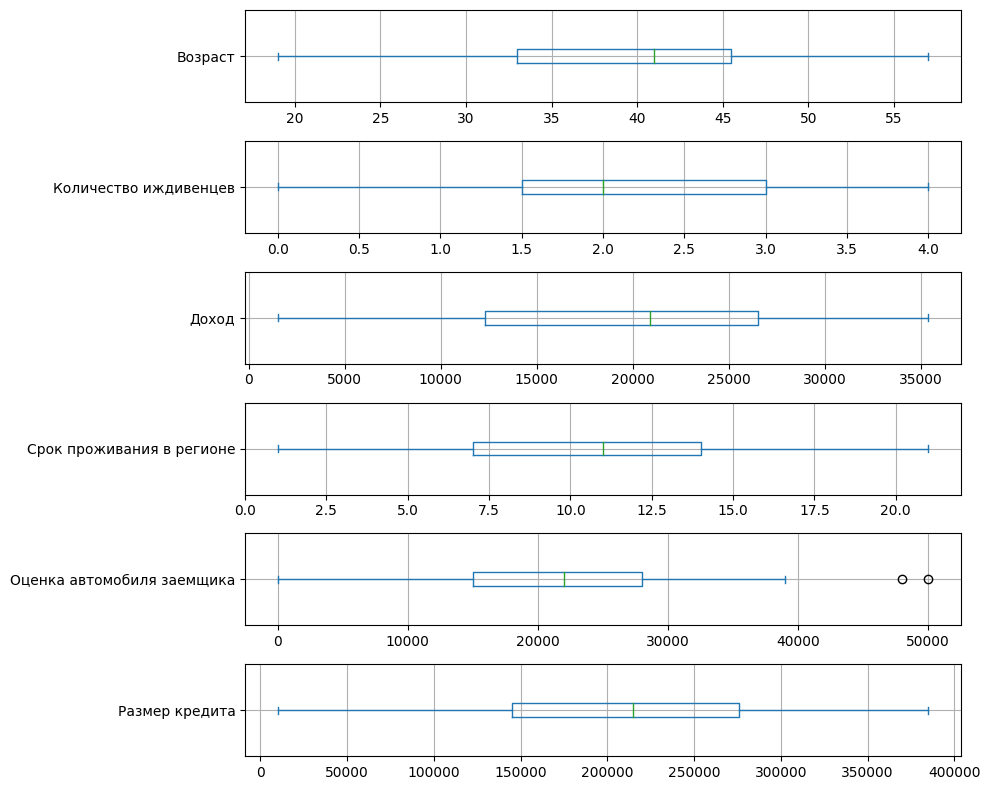

In [44]:
fig, axes = plt.subplots(6, 1, figsize=(10, 8))

for ax, feature in zip(axes, data.columns):
    data[[feature]].plot.box(vert=False, grid=True, ax=ax)
fig.tight_layout()    

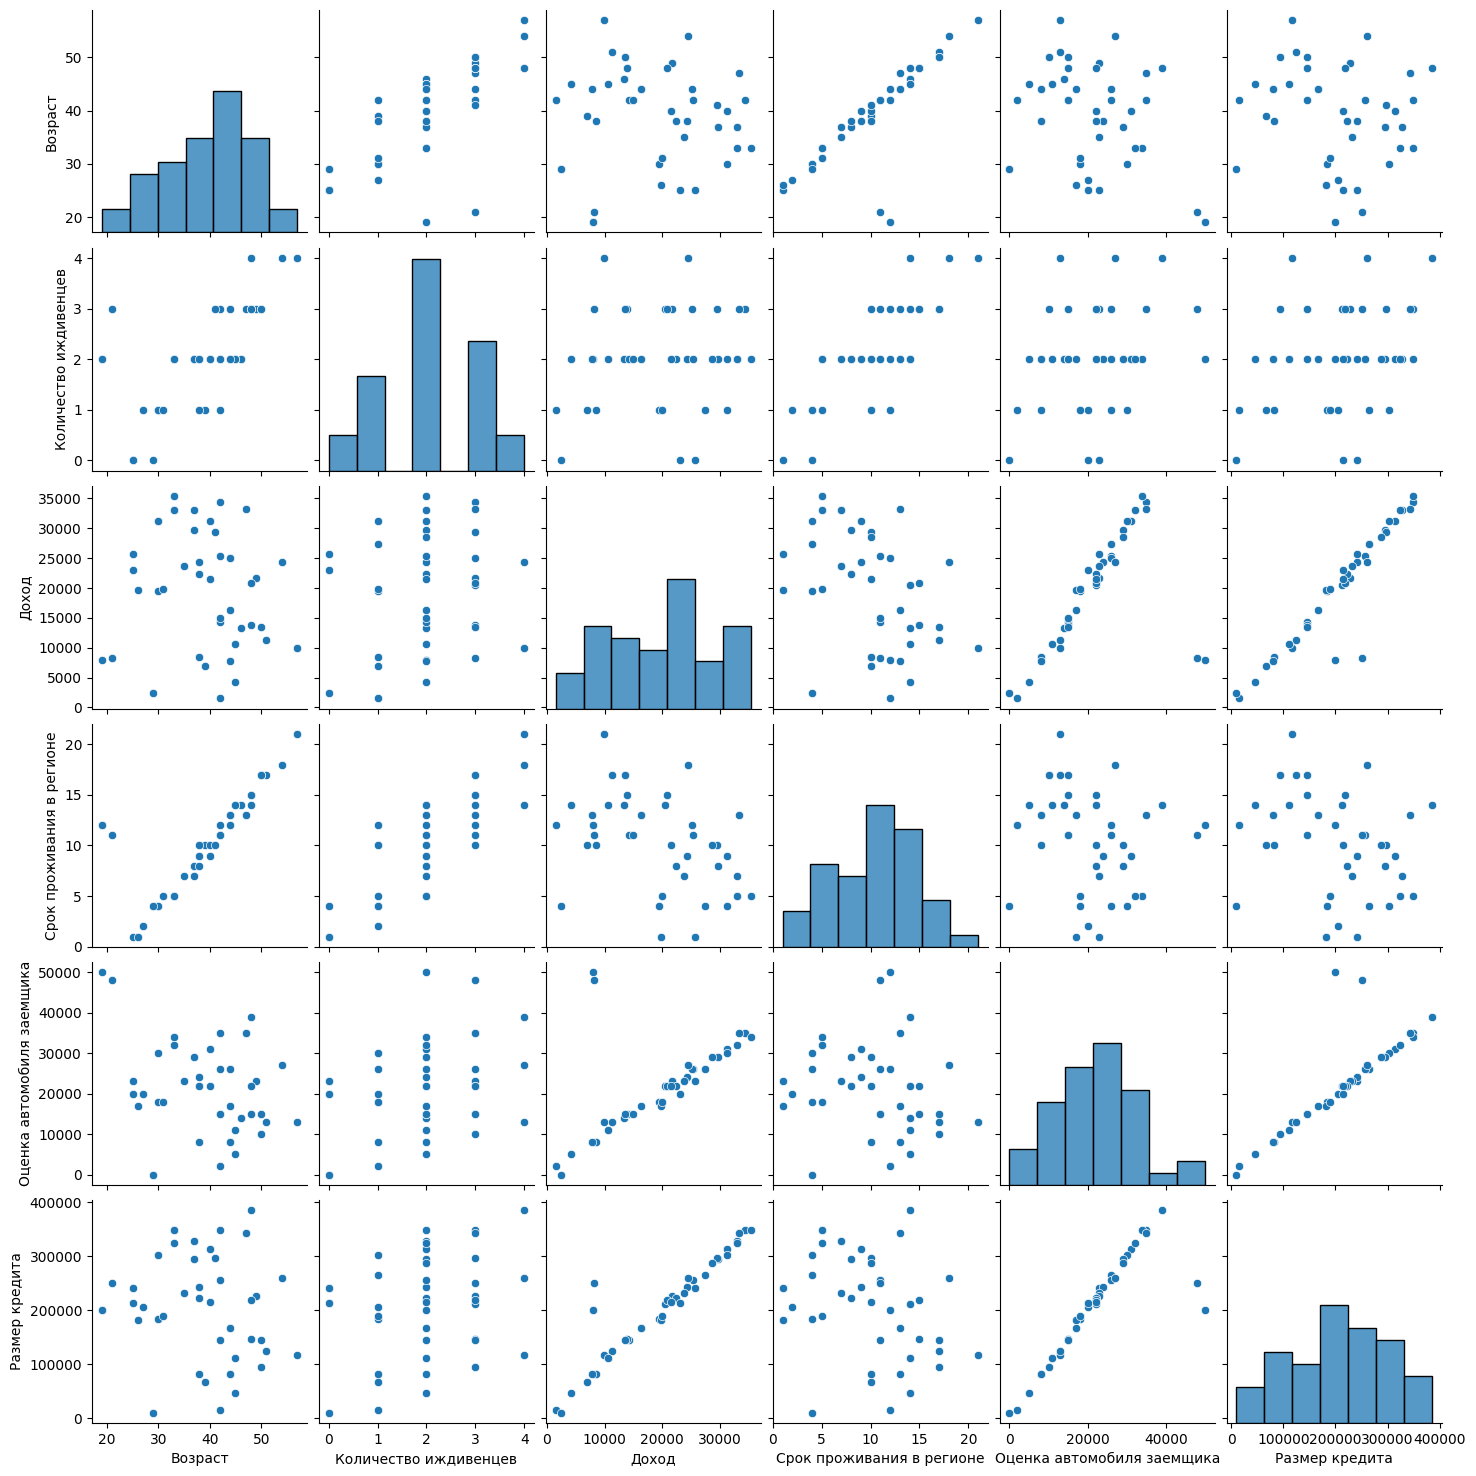

In [45]:
sns.pairplot(data);

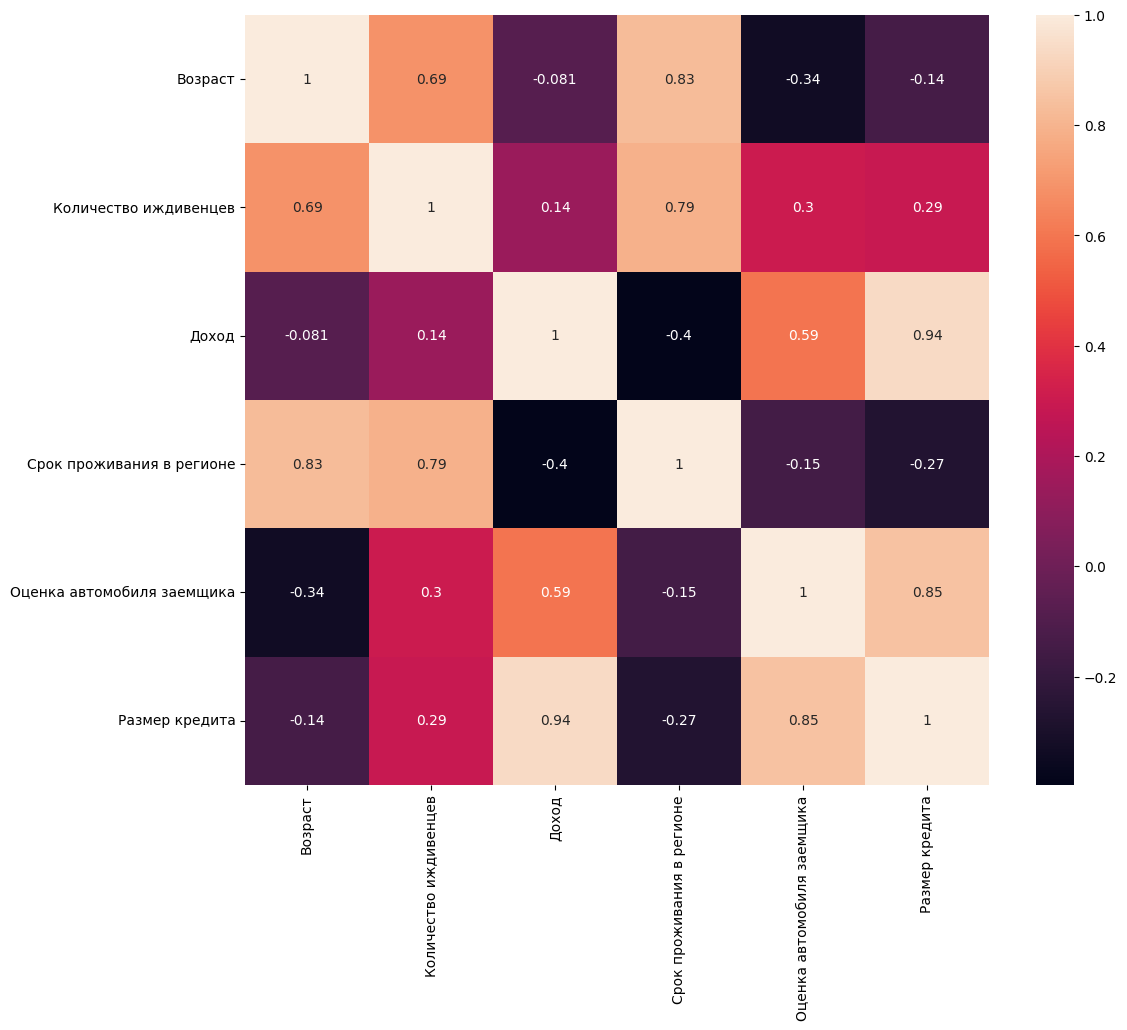

In [46]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

### Выводы

+ Исходя из построенных графиков, видна линейная зависимость пар признаков: (`Возраст`, `Срок проживания в регионе`), (`Доход`, `Размер кредита`, `Оценка автомобиля заемщика`).
+ Так как присутствуют пары сильно коррелированных признаков, можно успешно применить методы снижения размерности данных.
+ В данных имеются выбросы.

## Задание 2. 
В данных есть пропуски. Подберите из литературы метод восстановления пропущенных
данных и заполните пропуски по этому методу.

In [47]:
#кол-во пропущенных значений в каждом из столбцов
data.isna().sum()

Возраст                       3
Количество иждивенцев         3
Доход                         3
Срок проживания в регионе     3
Оценка автомобиля заемщика    3
Размер кредита                3
dtype: int64

In [48]:
def impute_data(data, imputer_class):
    np_data = imputer_class.fit_transform(data)
    return pd.DataFrame(np_data, columns=data.columns)

In [49]:
# Заполняем пропущенными значениями с помощью класса KNNImputer из sklearn

# simple_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
# iter_imputer = IterativeImputer(max_iter=10, random_state=0)
knn_imputer = KNNImputer(n_neighbors=4, weights="uniform")

data = impute_data(data, knn_imputer)

In [50]:
data.isna().sum()

Возраст                       0
Количество иждивенцев         0
Доход                         0
Срок проживания в регионе     0
Оценка автомобиля заемщика    0
Размер кредита                0
dtype: int64

### Выводы

+ Использован метод заолнения пропуск с использованием поиска `K` ближайших соседней (`K` = 4). Метод находит `K` ближайших соседей и усредняет их значение в целевой колонке

## Задание 3. 
В данных возможны выбросы. Подберите из литературы метод определения выбросов и удалите объекты, идентифицированные как выбросы по этому методу. 

In [51]:
# Удаление выбросов с помощью класса IsolationForest из sklearn

isof = IsolationForest(n_estimators=10, warm_start=True, max_samples=40, max_features=2)
isof_outliers_targets = isof.fit_predict(data)

In [52]:
# Удаление выбросов с помощью класса LocalOutlierFactor из sklearn

lof = LocalOutlierFactor(n_neighbors=5)
lof_outliers_targets = lof.fit_predict(data)

In [53]:
def interquartile_range(data):
    quantile_1 = data.quantile(0.25)
    quantile_3 = data.quantile(0.75)

    IQR = quantile_3 - quantile_1

    left_bound = quantile_1 - 1.5 * IQR
    right_bound = quantile_3 + 1.5 * IQR

    outliers_mask = ((data < left_bound) | (data > right_bound)).any(axis=1)
    result = np.ones(data.shape[0])
    result[outliers_mask] = -1
    return result

iqr_outliers_target = interquartile_range(data)

In [54]:
mds = MDS(n_components=2, max_iter=300, normalized_stress='auto', dissimilarity='euclidean')
data_dim_2 = mds.fit_transform(data)

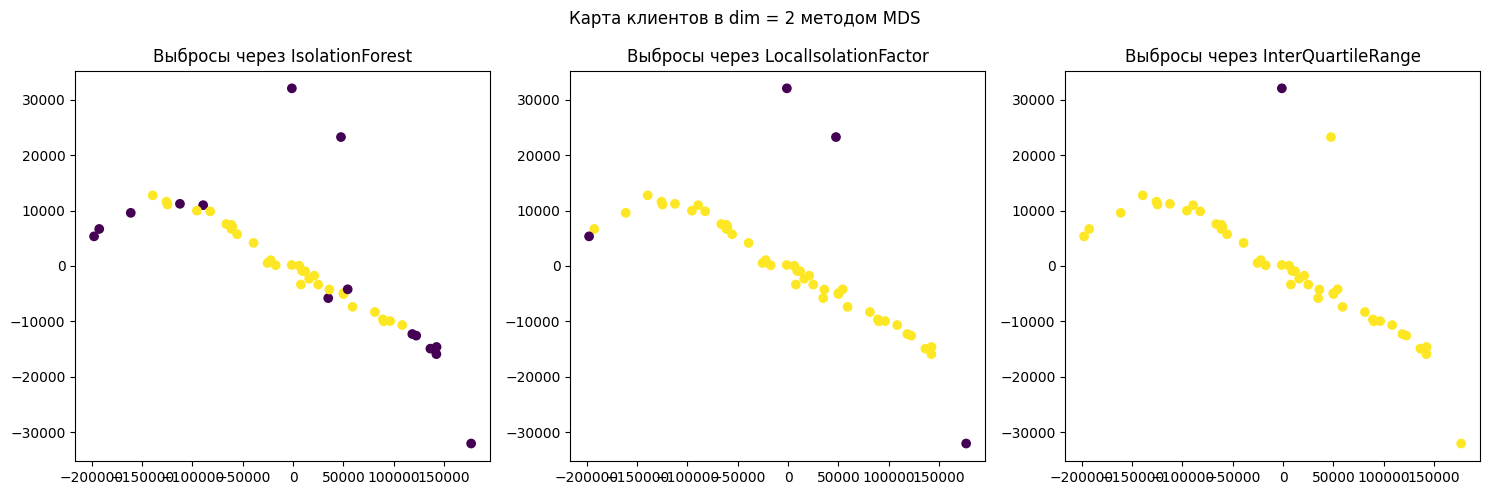

In [55]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.scatter(data_dim_2.T[0], data_dim_2.T[1], c=isof_outliers_targets)
ax1.set_title('Выбросы через IsolationForest')
ax2.scatter(data_dim_2.T[0], data_dim_2.T[1], c=lof_outliers_targets)
ax2.set_title('Выбросы через LocalIsolationFactor')
ax3.scatter(data_dim_2.T[0], data_dim_2.T[1], c=iqr_outliers_target)
ax3.set_title('Выбросы через InterQuartileRange')
plt.suptitle('Карта клиентов в dim = 2 методом MDS');
plt.tight_layout()

In [56]:
data = data[lof_outliers_targets == 1]

### Выводы

+ В качестве метода определения выбросов выбран метод `LocalIsolationFactor`. Результаты сравнения методов представлены выше.

## Задание 4. 
Выполнить центрирование данных и такую нормировку, что евклидова норма каждого
признака равна 1 (полученная матрица обозначается через Z). 

In [57]:
def norm_data(data):
    _mean = data.mean(axis=0)
    _norm = np.sqrt((data - _mean).pow(2).sum(axis=0))
    return (data - _mean) / _norm

In [58]:
Z = norm_data(data)
Z.head(10)

,Возраст,Количество иждивенцев,Доход,Срок проживания в регионе,Оценка автомобиля заемщика,Размер кредита
0,-0.308680,-0.349092,0.091086,-0.306481,0.044164,0.063027
1,0.101623,-0.178605,0.120854,-0.207843,0.099672,0.105680
2,-0.048488,-0.008118,0.066571,-0.043447,0.062666,0.064804
3,-0.108532,-0.008118,0.056065,-0.109206,0.044164,0.045255
4,0.031571,-0.008118,0.084082,0.022311,0.099672,0.089685
7,-0.068503,-0.008118,0.218912,-0.109206,0.192185,0.217643
8,0.031571,0.162368,0.243427,-0.035228,0.266195,0.253187
9,-0.008459,-0.008118,0.189145,-0.043447,0.192185,0.192763
10,0.111630,-0.008118,-0.126044,0.120948,-0.122359,-0.116470
11,-0.148562,-0.008118,0.260938,-0.174964,0.247692,0.253187


In [59]:
for norm_value, column_name in zip(np.linalg.norm(Z, axis=0), Z.columns):
    print(f"Евклидова норма {column_name} = {round(norm_value)}")

Евклидова норма Возраст = 1
Евклидова норма Количество иждивенцев = 1
Евклидова норма Доход = 1
Евклидова норма Срок проживания в регионе = 1
Евклидова норма Оценка автомобиля заемщика = 1
Евклидова норма Размер кредита = 1


## Задание 5.
Найти SVD разложение матрицы Z (матрицы U, S, V).

In [60]:
U, S, V_T = np.linalg.svd(Z, full_matrices=True)

6. Исследуйте, сколько скрытых факторов (главные факторы) достаточно для хорошей
аппроксимации матрицы данных Z.  <br>

In [61]:
def get_explained_variances(singular_values):
    return np.cumsum((singular_values ** 2)) / np.sum(singular_values ** 2)

In [62]:
var_retained = get_explained_variances(S)
print(var_retained)

[0.58554885 0.94798758 0.97684188 0.99826346 0.99967127 1.        ]


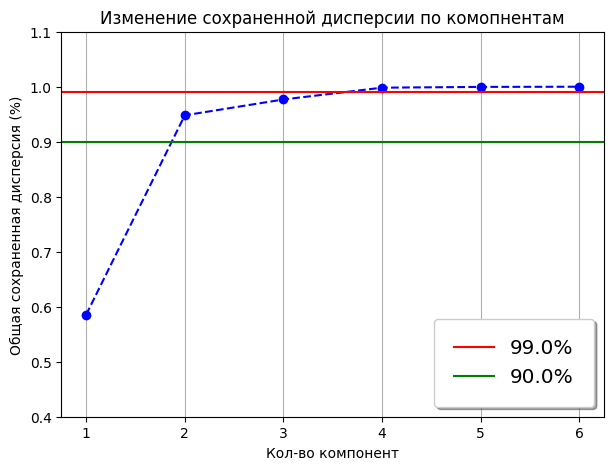

In [63]:
fig, ax = plt.subplots(figsize=(7, 5))

plt.ylim(0.4, 1.1)
plt.plot(np.arange(1, 7, step=1), var_retained, marker='o', linestyle='--', color='b')

plt.title('Изменение сохраненной дисперсии по комопнентам')
plt.xlabel('Кол-во компонент')
plt.ylabel('Общая сохраненная дисперсия (%)')
plt.xticks(np.arange(1, 7, step=1))

upper_threshold = 0.99
lower_threshold = 0.90

plt.axhline(y=upper_threshold, color='r', linestyle='-', label=f"{upper_threshold * 100}%")
plt.axhline(y=lower_threshold, color='g', linestyle='-', label=f"{lower_threshold * 100}%")

ax.grid(axis='x')
ax.legend(loc='lower right', shadow=True, borderpad=1, fontsize="x-large")
plt.show()

### Выводы

+ Три компоненты объясняют 90% дисперсии
+ Четыре и более компонент достаточно для 99%

## Задача 7. 
Замените значения исходных признаков линейными комбинациями главных факторов (матрица Zk, k – число главных факторов). Вычислите погрешность аппроксимации в операторной матричной норме и норме Фробениуса.

In [64]:
def get_metrics(original_matrix, approximated_matrix):
    errors = original_matrix - approximated_matrix
    print(f'Spectral norm = {np.linalg.norm(errors, ord=2).round(3)}')
    print(f'Frobenius norm = {(np.linalg.norm(errors, ord="fro")).round(3)}')

In [65]:
rank = 2
approximated_matrix = np.zeros((len(U), len(V_T)))
for precision_id in range(rank):
    approximated_matrix += S[precision_id] * np.outer(U.T[precision_id], V_T[precision_id])
    
get_metrics(Z, approximated_matrix)

Spectral norm = 0.416
Frobenius norm = 0.559


## Задача 8. 
Используя выделенные главные факторы, найти представления клиентов векторами меньшей
размерности (размерности k) и построить карту клиентов. Сделать выводы о клиентах банка.

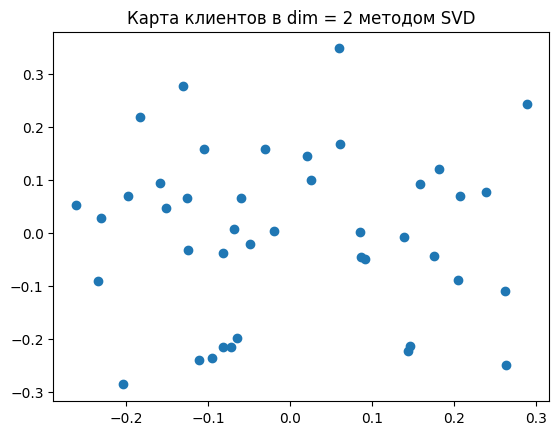

In [66]:
low_rank_embs = U[:,:2]
plt.scatter(low_rank_embs.T[0], low_rank_embs.T[1], );
plt.title('Карта клиентов в dim = 2 методом SVD');

## Задача 9. 
Вычислите расстояние между клиентами любым понравившемся вам способом. <br>Проверьте,
можно ли клиентов банка поместить в евклидово пространство размерности 2 с сохранением
расстояний между клиентами.  <br>

In [67]:
print('Евклидово растояние между клиентами')
print(euclidean_distances(Z))

Евклидово растояние между клиентами
[[0.         0.46144339 0.50407923 ... 0.29698032 0.65029081 0.82016644]
 [0.46144339 0.         0.29088102 ... 0.37776419 0.46555393 0.6731815 ]
 [0.50407923 0.29088102 0.         ... 0.30516214 0.30212886 0.53357731]
 ...
 [0.29698032 0.37776419 0.30516214 ... 0.         0.36265502 0.53096003]
 [0.65029081 0.46555393 0.30212886 ... 0.36265502 0.         0.23229826]
 [0.82016644 0.6731815  0.53357731 ... 0.53096003 0.23229826 0.        ]]


In [68]:
gram_m = Z.to_numpy() @ Z.to_numpy().T
eigvals = np.linalg.eigvals(gram_m)

In [69]:
print(f'Для того, чтобы проверить возможность перенос клиентов банка в пространство размерности 2,' 
      f'надо чтобы все собственные значения матрицы Грама были >= 0: \n{eigvals.tolist()}')

Для того, чтобы проверить возможность перенос клиентов банка в пространство размерности 2,надо чтобы все собственные матрицы Грама были >= 0: 
[3.5132931137043704, 2.174632389358628, 0.12852950423970944, 0.17312577641611493, 0.008446818234142818, 0.0019723980470372163]


### Выводы: Все собственные числа неотрицательные, значит мы можем это сделать.

## Задача 10. 
Используйте любой из алгоритмов MDS для размещения объектов в евклидовом
пространстве размерности 2. Оцените погрешность такого размещения. Постройте карту
клиентов. Сравните с картой клиентов из п.8 и сделайте выводы.

In [70]:
mds = MDS(n_components=2, max_iter=300, normalized_stress='auto', dissimilarity='euclidean')
X_transformed = mds.fit_transform(Z)
print(f'Погрешность размещения: {round(mds.stress_, 2)}')

Погрешность размещения: 0.88


In [77]:
#ПОдумать как это оформить
print('Евклидово растояние между клиентами')
print(euclidean_distances(Z))

print('\nЕвклидово растояние между клиентами после MDS')
print(euclidean_distances(X_transformed))

Евклидово растояние между клиентами
[[0.         0.46144339 0.50407923 ... 0.29698032 0.65029081 0.82016644]
 [0.46144339 0.         0.29088102 ... 0.37776419 0.46555393 0.6731815 ]
 [0.50407923 0.29088102 0.         ... 0.30516214 0.30212886 0.53357731]
 ...
 [0.29698032 0.37776419 0.30516214 ... 0.         0.36265502 0.53096003]
 [0.65029081 0.46555393 0.30212886 ... 0.36265502 0.         0.23229826]
 [0.82016644 0.6731815  0.53357731 ... 0.53096003 0.23229826 0.        ]]

Евклидово растояние между клиентами после MDS
[[0.         0.34578221 0.51450943 ... 0.3098206  0.65910491 0.83370295]
 [0.34578221 0.         0.20394813 ... 0.26832438 0.46176369 0.68740766]
 [0.51450943 0.20394813 0.         ... 0.30214759 0.29931081 0.53263241]
 ...
 [0.3098206  0.26832438 0.30214759 ... 0.         0.3528128  0.52629166]
 [0.65910491 0.46176369 0.29931081 ... 0.3528128  0.         0.23334195]
 [0.83370295 0.68740766 0.53263241 ... 0.52629166 0.23334195 0.        ]]


In [72]:
print(f'Shape of Z Before MDS {Z.shape}\nShape of Z After MDS {X_transformed.shape}')

Shape of Z Before MDS (42, 6)
Shape of Z After MDS (42, 2)


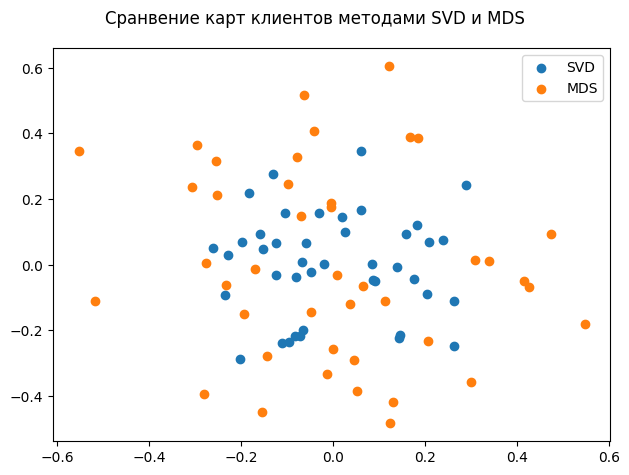

In [73]:
plt.scatter(low_rank_embs.T[0], low_rank_embs.T[1], label='SVD');
plt.scatter(X_transformed.T[0], X_transformed.T[1], label='MDS');

plt.legend()
plt.suptitle('Сранвение карт клиентов методами SVD и MDS');
plt.tight_layout()

### Вывод:
+ Так как MDS старается сохранить расстоние между объектами - его представление получается более разреженным по сравнению с SVD

## Бонус

1. Выписать матрицу коэффициентов разложения признаков $z^j$ по главным факторам.<br>
Исследовать структуру этой матрицы с целью выделения групп признаков тесно связанных с
каждым из главных факторов. <br>

2. На основе анализа структуры матрицы коэффициентов разложения, предложить
интерпретацию выделенным главным факторам. <br>Дать интерпретацию построенной выше карте
клиентов.

In [74]:
coef_matrix = np.array([S[i] * V_T[i] for i in range(rank)])
coef_matrix

array([[ 0.65214107,  0.29170357, -0.92474481,  0.75505796, -0.87684737,
        -0.89932606],
       [ 0.70059153,  0.90677748,  0.37000787,  0.56105418,  0.47201947,
         0.43251418]])

In [75]:
coefficients = pd.DataFrame(coef_matrix, columns=data.columns, index=[1, 2])
coefficients

,Возраст,Количество иждивенцев,Доход,Срок проживания в регионе,Оценка автомобиля заемщика,Размер кредита
1,0.652141,0.291704,-0.924745,0.755058,-0.876847,-0.899326
2,0.700592,0.906777,0.370008,0.561054,0.472019,0.432514


### Вывод: исходя из полученной матрицы коэффициентов разложения, мы можем сделать выводы:
 + Первая компонента содержит в себе информацию о признаках `Доход`, `Оценка автомобиля заемщика`, `Размер кредита` (сама большая отрицательная корреляция)
 + Вторая компонента содержит в себе информацию о признаках `Количество иждивенцев` (сама большая положительная корреляция)